<a href="https://colab.research.google.com/github/manisekharan/quantum-computing/blob/main/Level1_1_qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Activity 1: Learning IBM Qiskit

In [3]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 21.6 MB/s eta 0:00:00


In this tutorial, we will learn about the basic components of a Qiskit code in order to ***build*** our first quantum circuit, ***execute*** it on a quantum simulator and ***analyze*** the outputs that we obtain. 


> **Step 1.** Import required packages. 

We need to use pre-existing functions from different libraries for successfully running the code. Broadly speaking, we will need to import four types of libraries (of course, you can feel free to include more!):
1. Python libraries required for various operations: Some libraries to keep in mind would be ***numpy*** and ***scipy*** (for advanced mathematical operations), ***matplotlib*** (for visualizing data with various plots).

2. Qiskit packages used for building a quantum circuit: We will need to initiaze and store qubits (***QuantumRegister***), store the measurement results to classical bits (***ClassicalRegister***), and build a circuit (***QuantumCircuit***).

3. Qiskit packages used to simulate the quantum circuit: We will need to run the quantum circuit we built on a simulator or a quantum computer (***execute***). Here, we will use the basic backend provided in Qiskit (***Aer***).

4. Qiskit packages used to visualize and analyze results: We will use the most basic histogram plot (***plot_histogram***) from the ***qiskit.visualization*** package. 

In [4]:
#Python libraries required for various operations
import numpy as np

#Qiskit packages used for building a quantum circuit
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit

#Qiskit packages used to execute and simulate the quantum circuit
from qiskit import execute, Aer

#Qiskit packages used to visualize and analyze results
from qiskit.visualization import plot_histogram

> **Step 2.** Build a quantum circuit. 

As a part of this step, to build a circuit, we will need to
1. initialize variables (quantum and classical registers, cicuit itself)
2. add gates (operations and measurements)
3. visualize the circuit

Here, we will build a quantum circuit with one qubit which is made to pass through a ***Hadamard gate*** to create equal superposition of 0 and 1.

In [5]:
#Create quantum register to store qubit
qreg_q = QuantumRegister(1, 'q')

#Create classical register to store the results
creg_c = ClassicalRegister(1, 'c')

#Initialize quantum circuit
circuit = QuantumCircuit(qreg_q, creg_c)

#Initialize all qubits to |0>
circuit.reset(qreg_q)

#Apply the Hadamard gate on the qubit
circuit.h(qreg_q)

#Apply measurement
circuit.measure(qreg_q, creg_c)

#Visualize the constructed circuit
circuit.draw()

┌───┐┌─┐
  q: ─|0>─┤ H ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

> **Step 3.** Circuit execution and experimentation. 




***Qiskit Aer*** is a high performance simulator framework for quantum circuits. We can change the backend of Aer to achieve different simulation goals. We can even include an actual quantum computer on the backend (as opposed to a simulator) for more complicated circuits. 

Note that number of shots refers to the number of times the circuit is run.  

In [6]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\n Output counts:",counts)


 Output counts: {'1': 500, '0': 500}


> **Step 4.** Analyze and visualize results. 

We will now plot the probablity of getting 0s and 1s after the execution of the circuit. The probabilities are computed by taking the respective counts and dividing by the total number of shots.

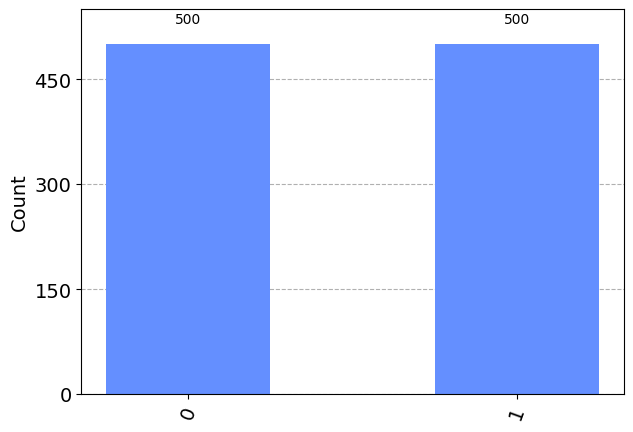

In [7]:
# Plot a histogram
plot_histogram(counts)

Some things to try:
1. Run the code multiple times to check if the results remain the same.
2. Change the number of shots to see if the results differ significantly.